In [115]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [117]:
# Defining file paths
data_path = "../TM2025_project/data/preprocessed_letters.csv"
output_path = "../TM2025_project/sentiment_predictions_posneg.csv"

In [119]:
# Loading pre-trained sentiment analysis model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("assemblyai/distilbert-base-uncased-sst2")
model = AutoModelForSequenceClassification.from_pretrained("assemblyai/distilbert-base-uncased-sst2")

D:\Programs\anaconda3\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [120]:
# Loading data
data = pd.read_csv(data_path)
text_column = 'letter'

In [121]:
def analyze_sentiment(text):
    tokens = tokenizer([text], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(input_ids=tokens.input_ids, attention_mask=tokens.attention_mask)
        probabilities = F.softmax(outputs.logits, dim=1)
    positive_prob = probabilities[0][1].item()
    negative_prob = probabilities[0][0].item()
    #prediction = "Positive" if positive_prob >= 0.5 else "Negative"
    prediction = "Positive" if positive_prob > 0.5 else "Negative" if positive_prob < 0.5 else "Neutral"
    return positive_prob, negative_prob, prediction

def plot_emotion_distribution(title, csv_path):
    # Loading CSV
    df = pd.read_csv(csv_path)

    # Getting counts and percentages
    emotion_counts_abs = df['Prediction'].value_counts()
    emotion_counts_pct = (emotion_counts_abs / len(df)) * 100

    # Plotting the bar graph
    fig, ax = plt.subplots(figsize=(12, 6), facecolor='none')  # Transparent background
    bars = ax.bar(emotion_counts_abs.index, emotion_counts_abs.values, color='orange')

    # Annotating each bar with percentage
    for bar, pct in zip(bars, emotion_counts_pct.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{pct:.1f}%', 
                ha='center', va='bottom', fontsize=10)

    # Labels and styling
    ax.set_title(title)
    ax.set_ylabel("Number of Letters")
    ax.set_xlabel("Sentiment")
    ax.set_xticklabels(emotion_counts_abs.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_facecolor('none')  # Transparent axes background

    plt.tight_layout()
    plt.show()

In [125]:
# Adding sentiment scores and predictions
data[['Positive_Probability', 'Negative_Probability', 'Prediction']] = data[text_column].apply(
    lambda x: pd.Series(analyze_sentiment(str(x)))
)

In [126]:
# Saving results
data.to_csv(output_path, index=False)
print(f"Sentiment analysis results saved to: {output_path}")

Sentiment analysis results saved to: ../TM2025_project/sentiment_predictions_posneg.csv


C:\Users\kevin\AppData\Local\Temp\ipykernel_33764\2958263024.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_counts_abs.index, rotation=45, ha='right')


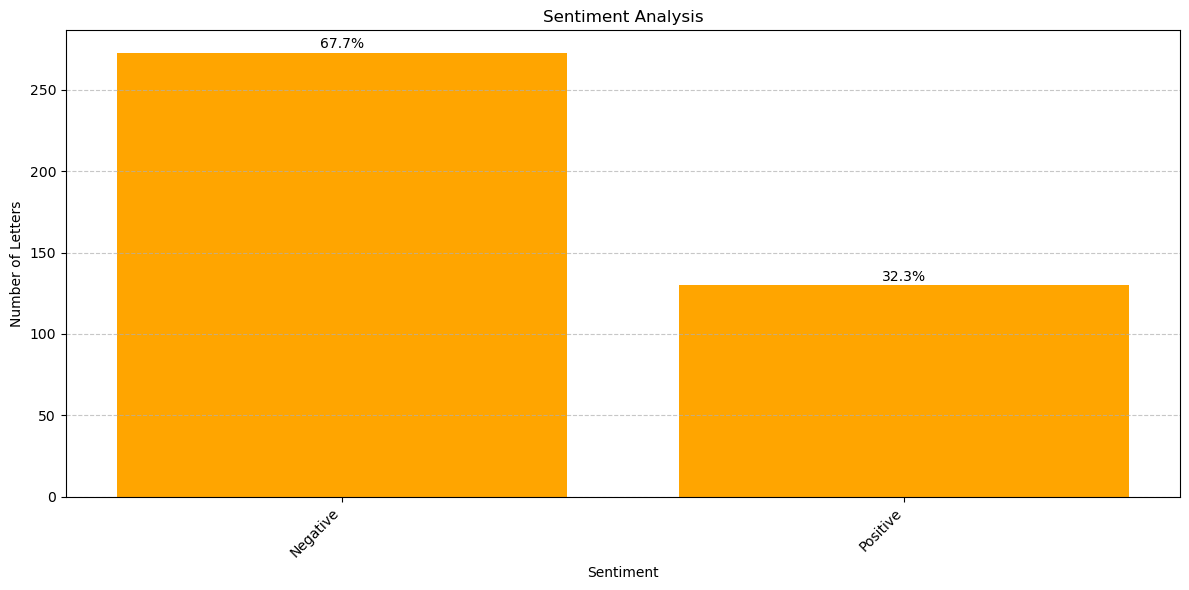

In [127]:
plot_emotion_distribution("Sentiment Analysis", output_path)